In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:/Users/K.ARAVIND DEEPAK/Downloads/Machine Learning/Insurance/new_insurance_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/K.ARAVIND DEEPAK/Downloads/Machine Learning/Insurance/new_insurance_data.csv'

In [ ]:
df.shape

(1338, 13)

In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.543130,17.0,715428.0,4.720921e+06,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.674370,7.0,699157.0,4.329832e+06,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.627590,19.0,702341.0,6.884861e+06,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.393320,11.0,700250.0,4.274774e+06,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.859410,16.0,711584.0,3.787294e+06,0.0,23012320.01,southeast,1137.0110
5,18.0,male,34.43,0.0,no,26488.339120,20.0,717162.0,3.696161e+06,0.0,NaN,southeast,1137.4697
6,18.0,male,37.29,0.0,no,33217.365480,13.0,699159.0,8.765292e+05,0.0,69060665.92,southeast,1141.4451
7,18.0,male,41.14,0.0,no,46770.585330,12.0,706423.0,4.486741e+06,0.0,97193784.44,southeast,1146.7966
8,18.0,male,43.01,0.0,no,9715.650411,17.0,NaN,9.216440e+06,0.0,58881971.93,southeast,1149.3959
9,18.0,male,53.13,0.0,no,17046.585150,19.0,704425.0,1.458972e+06,0.0,94261821.45,southeast,1163.4627


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
df.isnull().sum().sum()

52

In [ ]:
len(df)*0.10

133.8

In [ ]:
df.describe()

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
#null value imputation using mena,median,mode
for ifc in df.select_dtypes(include='float64').columns:
    if(df[ifc].skew()>0.5):
        print(ifc,'skewed')
        df[ifc]=df[ifc].fillna(df[ifc].median())
    else:
        print(ifc,'Normal')
        df[ifc]=df[ifc].fillna(df[ifc].mean())    

age Normal
bmi Normal
children skewed
Claim_Amount Normal
past_consultations Normal
num_of_steps Normal
Hospital_expenditure skewed
NUmber_of_past_hospitalizations Normal
Anual_Salary skewed
charges skewed


In [ ]:
df.isna().sum().sum()

0

age


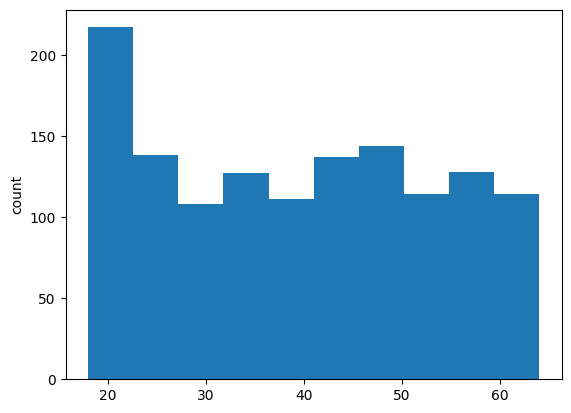

bmi


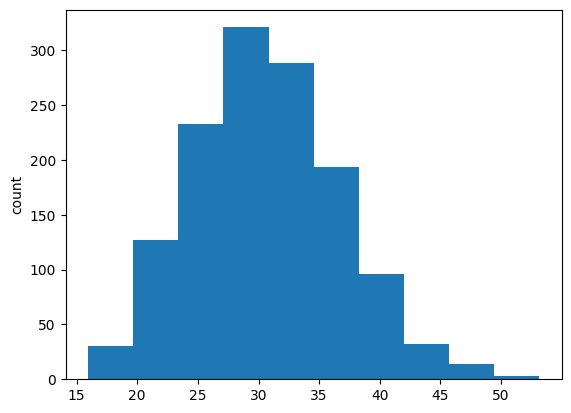

children


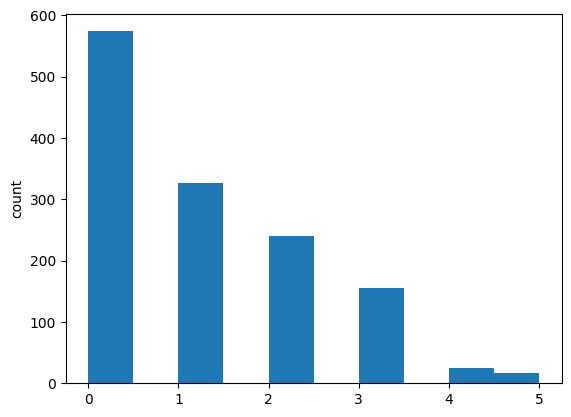

Claim_Amount


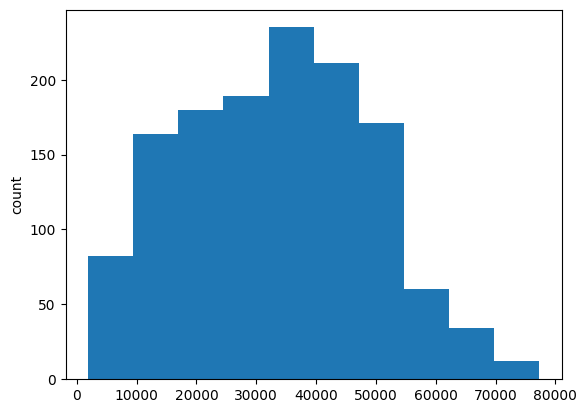

past_consultations


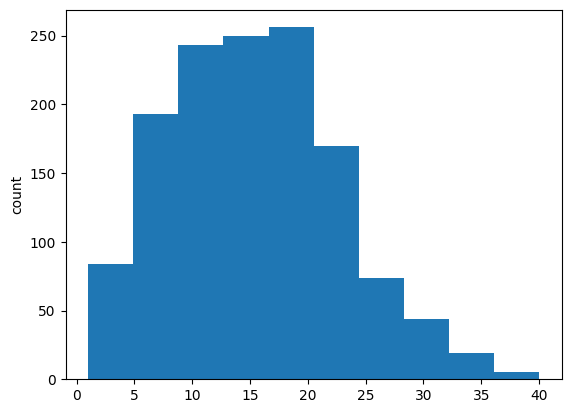

num_of_steps


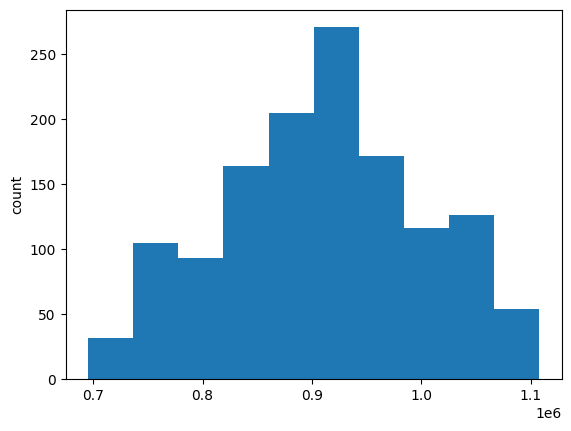

Hospital_expenditure


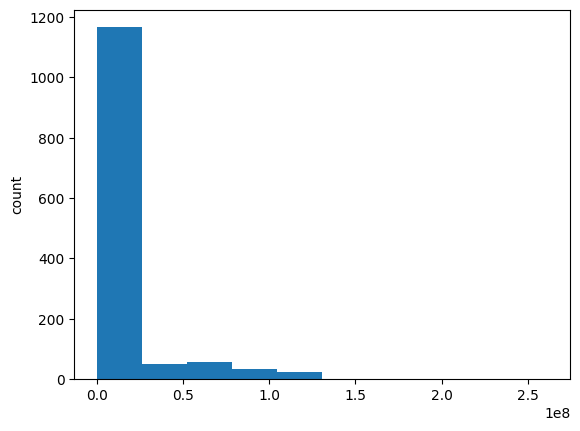

NUmber_of_past_hospitalizations


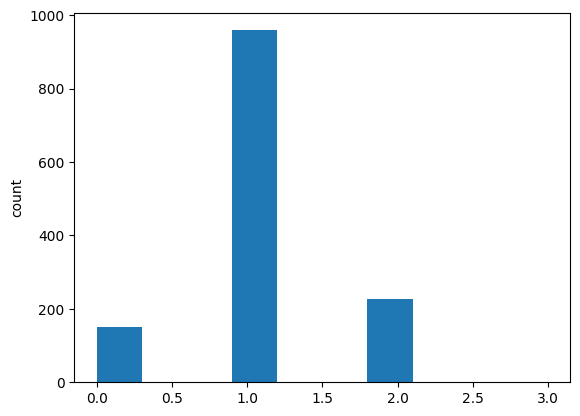

Anual_Salary


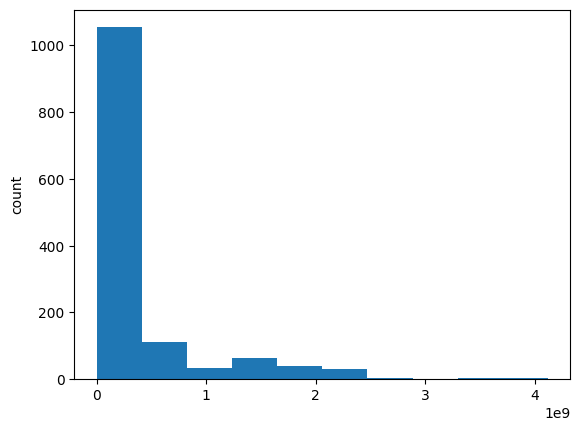

charges


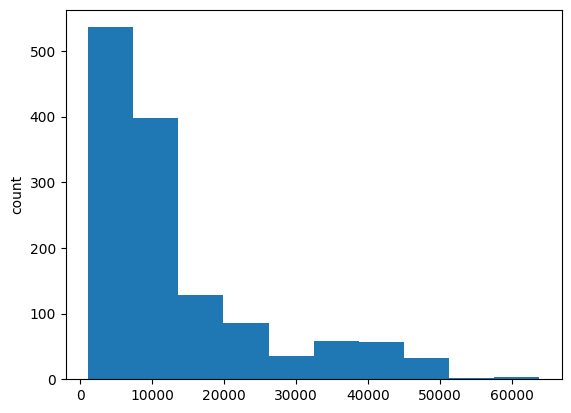

In [ ]:
#visualization for numerical features univariate analysis 
for i in df.select_dtypes(include='float64').columns:
    plt.hist(df[i])
    print(i)
    plt.ylabel("count")
    plt.show()

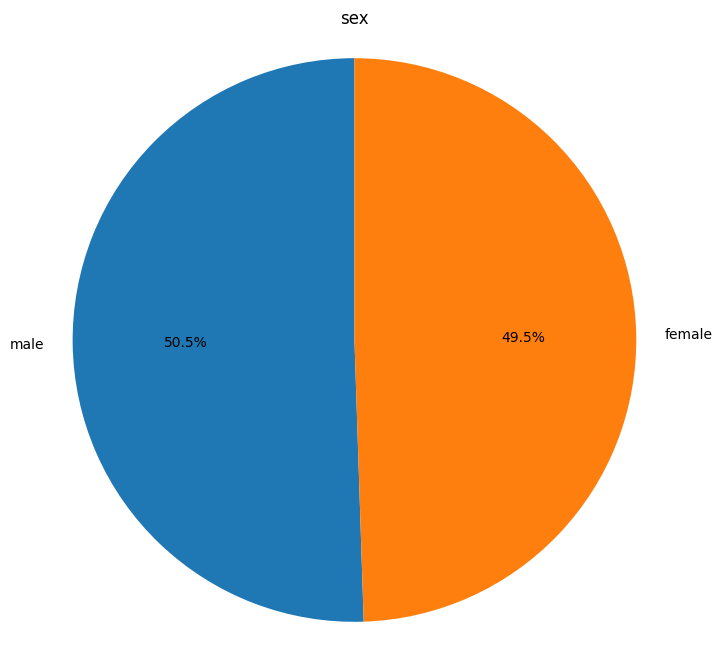

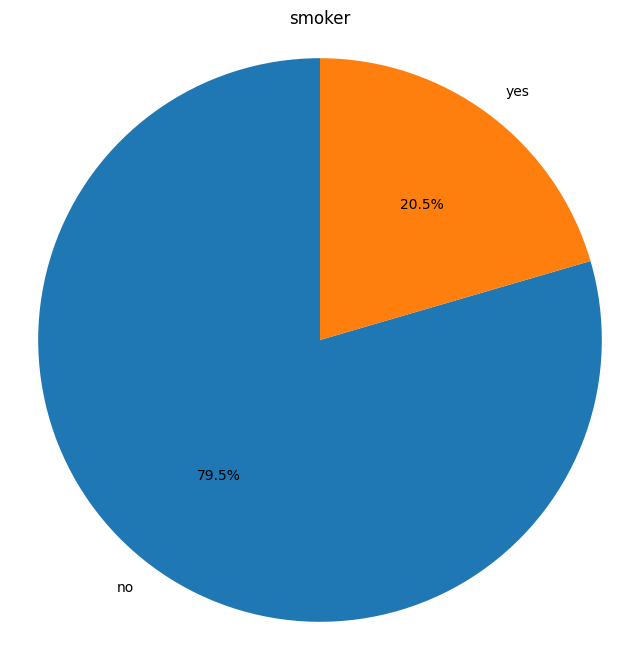

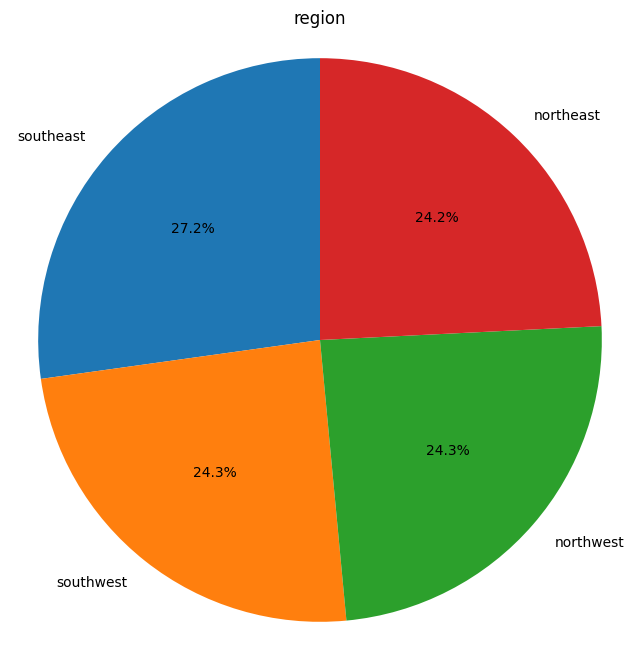

In [ ]:
#univariate analysis for categorical features
for i in df.select_dtypes(include='object_'):
    plt.figure(figsize=(8,8))
    cnt=df[i].value_counts()
    plt.title(i)
    plt.pie(cnt,labels=cnt.index,autopct='%1.1f%%',startangle=90)
    plt.axis('equal')
    plt.show()

<Axes: >

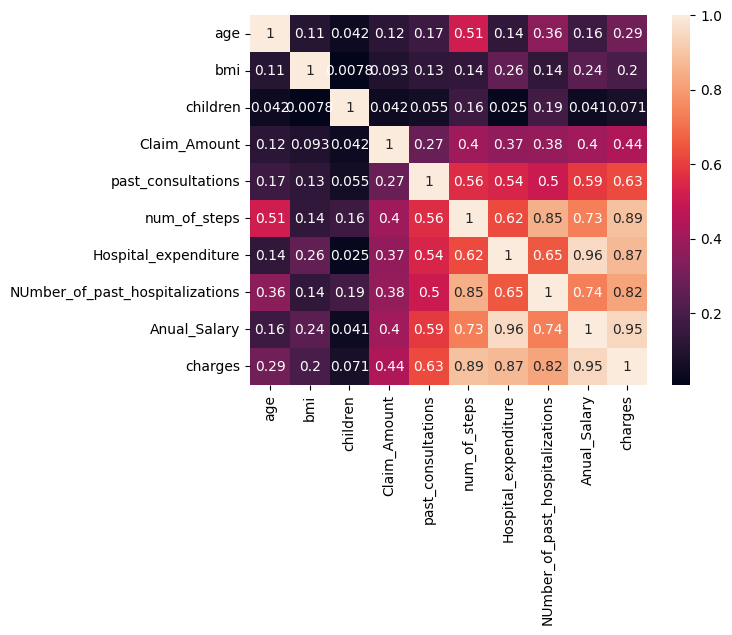

In [ ]:
#correlation matrix
df_num=df.select_dtypes(include='float64')
sns.heatmap(df_num.corr(),annot=True)

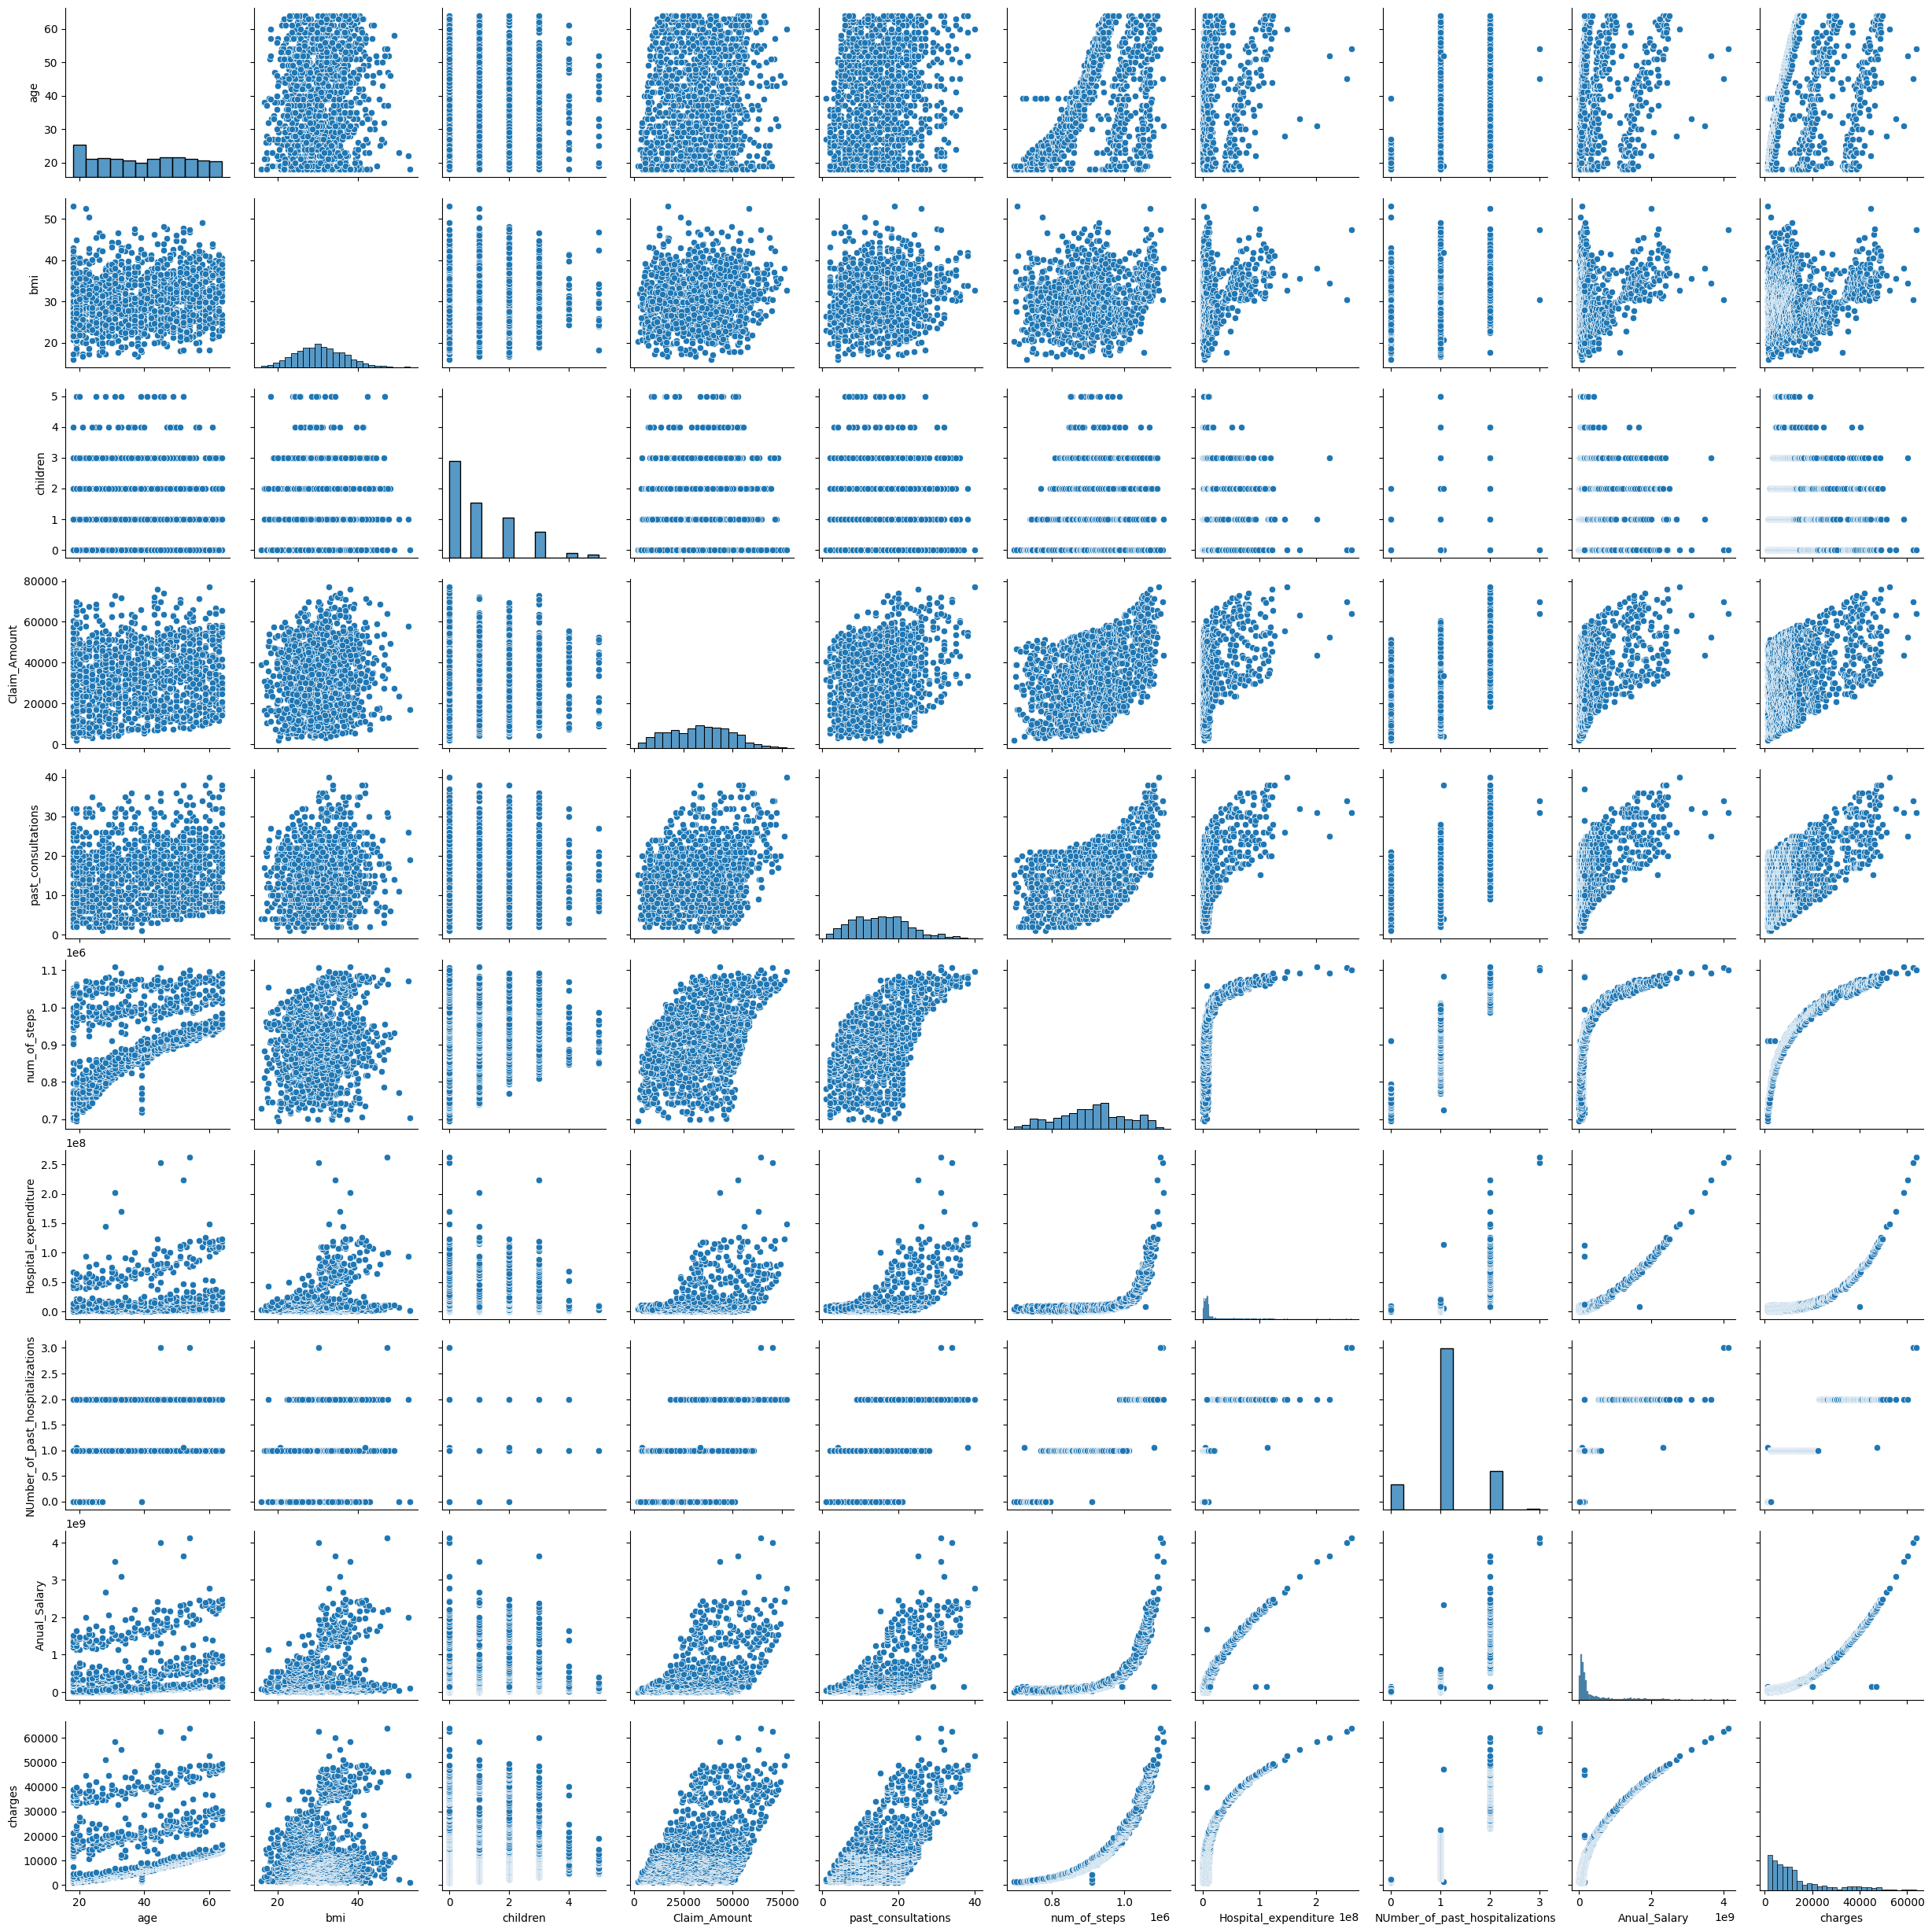

In [ ]:
#multivarite analysis 
sns.pairplot(df)

In [ ]:
#visualization checking distribution of data(histogram and kde) and outliers(boxplot)
num=df.select_dtypes(include='number').columns
cat=df.select_dtypes(include='object').columns

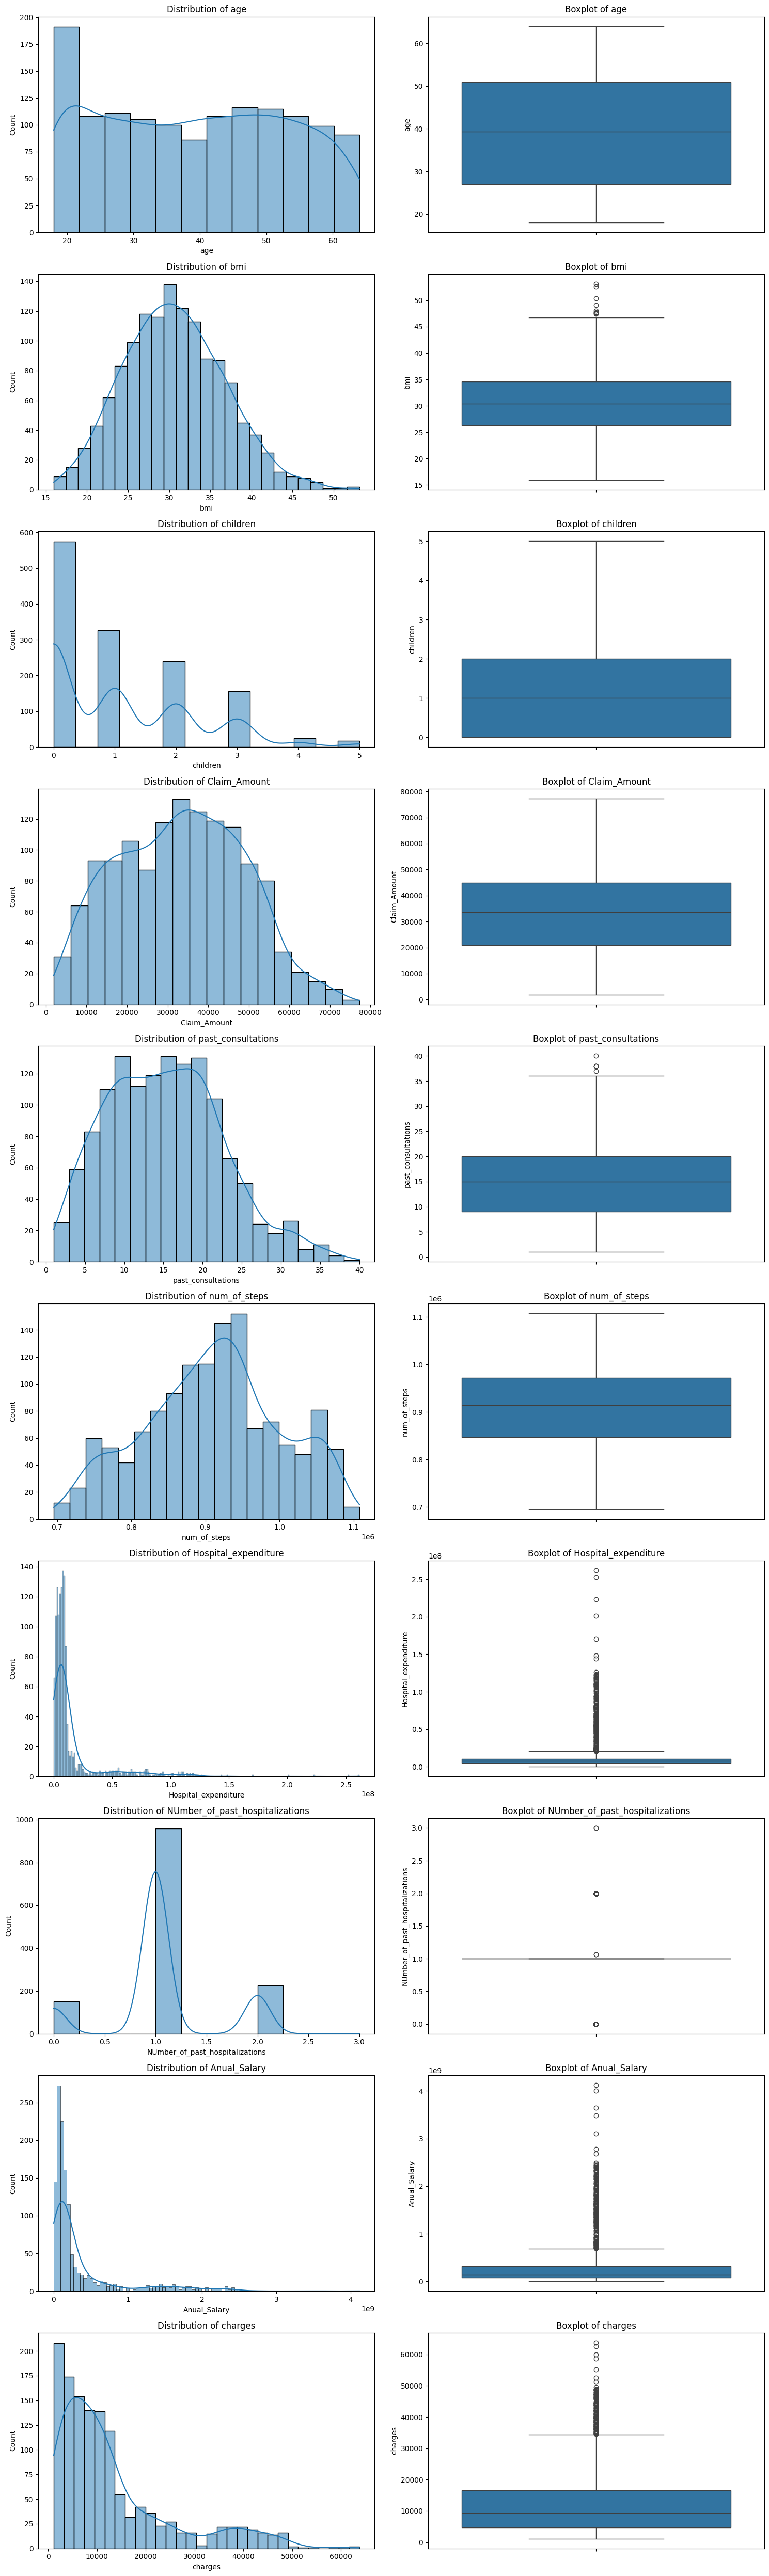

In [ ]:
num_plots=len(num)
num_rows=num_plots

fig,axes=plt.subplots(num_rows,2,figsize=(15,5*num_rows))

for i,col in enumerate(num):
    sns.histplot(df[col],kde=True,ax=axes[i,0])
    axes[i,0].set_title(f'Distribution of {col}')

    sns.boxplot(df[col],ax=axes[i,1])
    axes[i,1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()



In [ ]:
df[['children','charges']].corr()

,children,charges
children,1.000000,0.070877
charges,0.070877,1.000000


In [ ]:
df[num].corr() #multicollineartiy check for regression(independent variable should not be highly correlated with eachother)

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
age,1.000000,0.112161,0.041616,0.122828,0.168311,0.512985,0.137146,0.359391,0.163392,0.293604
bmi,0.112161,1.000000,0.007755,0.093313,0.130667,0.135903,0.256892,0.137060,0.241505,0.198691
children,0.041616,0.007755,1.000000,0.041502,0.054832,0.163487,0.025315,0.185535,0.041260,0.070877
Claim_Amount,0.122828,0.093313,0.041502,1.000000,0.271482,0.398342,0.369921,0.379731,0.403974,0.435635
past_consultations,0.168311,0.130667,0.054832,0.271482,1.000000,0.559682,0.542172,0.500268,0.589304,0.627592
num_of_steps,0.512985,0.135903,0.163487,0.398342,0.559682,1.000000,0.624835,0.845125,0.733685,0.889848
Hospital_expenditure,0.137146,0.256892,0.025315,0.369921,0.542172,0.624835,1.000000,0.652114,0.957189,0.871796
NUmber_of_past_hospitalizations,0.359391,0.137060,0.185535,0.379731,0.500268,0.845125,0.652114,1.000000,0.736062,0.820844
Anual_Salary,0.163392,0.241505,0.041260,0.403974,0.589304,0.733685,0.957189,0.736062,1.000000,0.946398
charges,0.293604,0.198691,0.070877,0.435635,0.627592,0.889848,0.871796,0.820844,0.946398,1.000000


In [ ]:
for i in num:
    if(df[i].skew()>0.5):
        print(i,'is positively skewed')
        if(df[i].skew()<-0.5):
            print(i,'is negatively skewed')
        df[i]=df[i].fillna(df[i].median())
    else:  
        print(i,'is not skewed')
        df[i]=df[i].fillna(df[i].mean())
    

age is not skewed
bmi is not skewed
children is positively skewed
Claim_Amount is not skewed
past_consultations is not skewed
num_of_steps is not skewed
Hospital_expenditure is positively skewed
NUmber_of_past_hospitalizations is not skewed
Anual_Salary is positively skewed
charges is positively skewed


In [ ]:
plt.figure(figsize=(15,15))

plt.show()


<Figure size 1500x1500 with 0 Axes>

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.shape

(1338, 13)

In [ ]:
out_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']

for i in out_list:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df=df[(df[i]>=lower_bound)&(df[i]<=upper_bound)]

In [ ]:
df.shape

(1030, 13)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
inflate=[]

for i in df.columns:
    if(df[i].dtype!='object')&(i!='charges'):
        inflate.append(i)
x=df[inflate]

vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data



,feature,VIF
0,age,15.597815
1,bmi,26.370730
2,children,2.028686
3,Claim_Amount,5.684934
4,past_consultations,6.257116
5,num_of_steps,61.480474
6,Hospital_expenditure,5.324681
7,NUmber_of_past_hospitalizations,12.061941
8,Anual_Salary,5.722229


In [ ]:
df=df.drop(['num_of_steps'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
inflate=[]

for i in df.columns:
    if(df[i].dtype!='object')&(i!='charges'):
        inflate.append(i)
x=df[inflate]

vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,14.624591
1,bmi,12.358450
2,children,2.016477
3,Claim_Amount,5.249896
4,past_consultations,5.835154
5,Hospital_expenditure,5.034107
6,NUmber_of_past_hospitalizations,10.710774
7,Anual_Salary,5.632586


In [ ]:
df=df.drop(['age'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
inflate=[]

for i in df.columns:
    if(df[i].dtype!='object')&(i!='charges'):
        inflate.append(i)
x=df[inflate]

vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,bmi,10.365704
1,children,1.977987
2,Claim_Amount,5.237207
3,past_consultations,5.816071
4,Hospital_expenditure,5.033064
5,NUmber_of_past_hospitalizations,8.409762
6,Anual_Salary,4.900566


In [ ]:
df=df.drop(['bmi'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
inflate=[]

for i in df.columns:
    if(df[i].dtype!='object')&(i!='charges'):
        inflate.append(i)
x=df[inflate]

vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,children,1.976202
1,Claim_Amount,4.548926
2,past_consultations,5.039156
3,Hospital_expenditure,4.567473
4,NUmber_of_past_hospitalizations,7.332251
5,Anual_Salary,4.854345


In [ ]:
df=df.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
inflate=[]

for i in df.columns:
    if(df[i].dtype!='object')&(i!='charges'):
        inflate.append(i)
x=df[inflate]

vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,children,1.714400
1,Claim_Amount,4.169418
2,past_consultations,4.671708
3,Hospital_expenditure,4.391913
4,Anual_Salary,4.398658


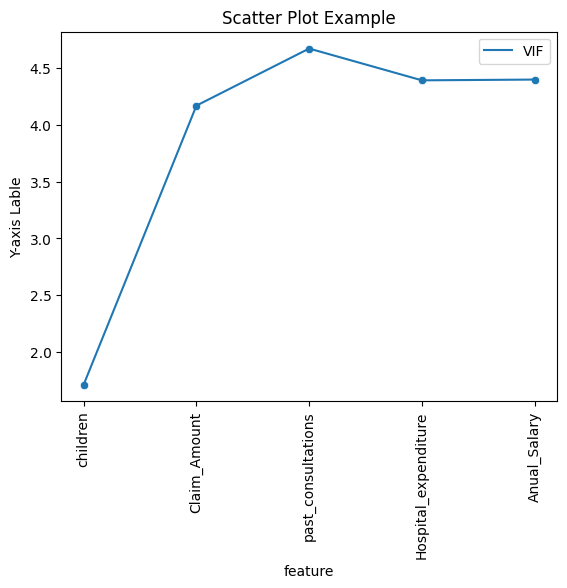

In [ ]:
sns.scatterplot(data=vif_data,x='feature',y='VIF')
sns.lineplot(data=vif_data)
plt.xticks(rotation=90)
plt.ylabel('Y-axis Lable')
plt.title('Scatter Plot Example')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,1.419361e+08


In [ ]:
y=df.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=999)
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
378,2.0,46073.654360,5.0,2.606962e+06,4.707590e+07
730,0.0,55821.532460,17.0,5.048570e+06,1.725900e+08
66,0.0,17975.327670,14.0,4.993491e+05,5.445941e+07
391,0.0,31971.078820,16.0,9.642962e+06,4.098743e+07
845,3.0,52155.958830,11.0,7.683186e+06,1.969077e+08
...,...,...,...,...,...
477,2.0,30943.342060,17.0,2.941387e+06,6.400286e+07
227,1.0,16091.000090,11.0,3.454417e+06,7.257541e+07
483,2.0,18512.993280,16.0,7.442466e+05,1.368503e+08
875,0.0,41844.564980,8.0,1.191697e+07,1.629471e+08


In [ ]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [ ]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
predictions=l_model.predict(x_test)

In [ ]:
predictions

array([10471.25366232,  5529.11641942,  6048.3521352 ,  4425.99288888,
        4118.86086489,  7154.72616596,  4648.07601626,  6222.23679043,
        3303.81369785,  7093.51748123,  4133.18968096,  5029.83661264,
        5313.11528517,  5704.04971904, 17078.46509779,  5435.55726456,
        8503.2403966 ,  8501.28232023,  9260.4972443 , 12948.55988319,
        7294.69367534,  8150.12881153,  4813.81049389,  3519.73342869,
        9416.80750606,  3345.9303182 ,  4401.60930292,  4878.02158984,
        3989.8767279 ,  3486.00012413,  4990.38933127,  4165.68838326,
        7555.35403259,  2168.56642128, 14409.90355062, 13197.08202657,
       17589.27499615, 16807.77427259, 10032.62391669,  7025.39336094,
        4897.52432215,  5966.24684499,  5652.36614818,  6765.28035804,
        7459.8774265 ,  5040.15795555,  5285.67826971, 19306.18534819,
        5778.08364604, 13137.04266397,  2203.79314232,  7088.18046215,
        6247.74907682,  4175.13089165,  9734.88884562,  6023.34477828,
      

In [ ]:
from sklearn.metrics import *
r2test=r2_score(y_test,predictions)
r2test

0.8434587218027592

In [ ]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [ ]:
predictions1=l_model.predict(x_train)

In [ ]:
predictions1

array([ 4066.93653426,  9996.50328444,  3475.20237072,  3640.27544383,
       11994.36867751,  6815.37643878,  3167.14138186,  5594.80626258,
       13112.05089243, 11530.41622014,  8654.01058829,  1946.54450211,
        8790.57897121, 15190.97858199,  2384.78487453,  5296.31712419,
        4026.9348113 ,  8037.76546851,  2003.31868654,  5873.45803135,
        2007.74307531,  7420.48264631,  3691.17777199, 10657.8674807 ,
        5494.26232837,  1974.44737694,  9742.62863247, 12820.50601806,
        8908.27588126, 10598.72035364,  7631.9116906 ,  3991.80860753,
        4018.71510026,  5900.26272799,  2134.06264849, 14599.73552618,
        9433.03367077,  5102.16018417,  9253.796101  ,  8799.04730689,
       13492.07540077,  4153.04097645,  7709.84757266, 10271.19744018,
        5371.39078519, 10450.8103237 , 12518.29446211,  6376.52533249,
        4813.43489726, 11504.78515412,  2756.12981011, 16447.74822197,
        9376.1331525 ,  2751.78234116,  6124.40710147,  5668.28384784,
      

In [ ]:
r2train=r2_score(y_train,predictions1)
r2train

0.8141490320743908

In [ ]:
a=l_model.predict([[3,47488,18,378499,3883929]])
a

array([2421.08567529])

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error:",mse)

Mean Squared Error: 3150553.81075752


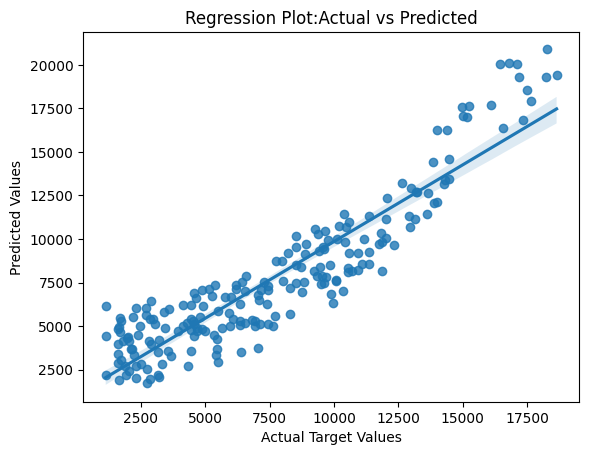

In [ ]:
sns.regplot(x=y_test,y=predictions)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot:Actual vs Predicted")
plt.show()

In [ ]:
import pickle
with open("Insurenace Model.pkl","wb") as f:
    pickle.dump(l_model,f)